In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Pradeep_redpine/Documents/"
master_data= pd.read_csv(path + 'master_data.csv')

master_data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad,ae,af,ag,ah,ai,aj,ak,al,am,an,ao,ap,aq,ar,as,label
0,0.759328,0.051102,0.050447,0.691667,0.067299,0.932701,0.066436,0.000863,0.148333,0.616667,0.640000,0.023333,0.230000,0.399393,0.195348,0.989070,0.214458,0.891566,0.925301,0.033735,0.066667,0.268333,0.390000,0.436667,-0.782787,-0.091628,-0.874415,0.028333,0.103333,0.096386,0.387952,0.563855,0.631325,0.040964,0.149398,0.055422,0.238554,-0.327711,-0.293976,5.419922,0.015931,4.815900,0.009824,8.935547,0.003691,109
1,0.901039,0.236481,0.234768,0.666667,0.262454,0.737546,0.260552,0.001901,0.156667,0.493333,0.513333,0.020000,0.263333,0.390981,0.173873,1.542268,0.235000,0.740000,0.770000,0.030000,0.071667,0.295000,0.390000,0.445000,-0.772208,-0.045414,-0.817622,0.033333,0.113333,0.107500,0.442500,0.585000,0.667500,0.050000,0.170000,0.057500,0.272500,-0.155000,-0.102500,3.881836,0.031337,5.712891,0.015067,7.910156,0.010668,109
2,0.881105,0.172121,0.164977,0.665000,0.195347,0.804653,0.187238,0.008109,0.151667,0.578333,0.613333,0.035000,0.246667,0.378558,0.172132,3.331376,0.228070,0.869674,0.922306,0.052632,0.070000,0.191667,0.221667,0.285000,-0.790663,0.098534,-0.692129,0.031667,0.111667,0.105263,0.288221,0.333333,0.428571,0.047619,0.167920,0.057644,0.120301,-0.536341,-0.493734,5.712891,0.017359,7.910156,0.013072,9.741211,0.004527,109
3,0.849716,0.135928,0.135301,0.683333,0.159969,0.840031,0.159231,0.000738,0.150000,0.620000,0.638333,0.018333,0.253333,0.374591,0.176530,3.020625,0.219512,0.907317,0.934146,0.026829,0.066667,0.281667,0.411667,0.460000,-0.823851,-0.109789,-0.933639,0.030000,0.103333,0.097561,0.412195,0.602439,0.673171,0.043902,0.151220,0.053659,0.260976,-0.304878,-0.260976,5.566406,0.018040,7.250977,0.008889,9.301758,0.005885,109
4,0.825774,0.139097,0.128035,0.675000,0.168444,0.831556,0.155049,0.013395,0.141667,0.586667,0.625000,0.038333,0.246667,0.342140,0.171556,2.781934,0.209877,0.869136,0.925926,0.056790,0.066667,0.268333,0.386667,0.433333,-0.865143,-0.061857,-0.927000,0.028333,0.103333,0.098765,0.397531,0.572840,0.641975,0.041975,0.153086,0.056790,0.244444,-0.296296,-0.283951,5.639648,0.017666,7.324219,0.011704,9.448242,0.006146,109


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
 
X=master_data.iloc[:,0:46][0:].to_numpy()

y=master_data.iloc[:,-1][0:].to_numpy()
y=y.reshape(-1,1)

#len(X),len(y)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(xtrain, ytrain)
 
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())


 


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
Training score:  0.9999999791594338
Mean cross-validation score: 0.99


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.99


In [ ]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))



MSE: 0.02
RMSE: 0.16


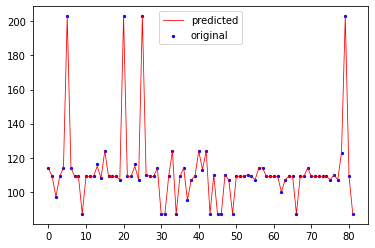

In [ ]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
#XGBOOST giving very good accuracy